In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
from IPython.display import display, SVG

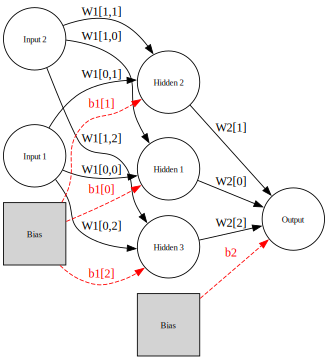

In [2]:
# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Define the neural network architecture
input_size = X.shape[1]
hidden_size = 3
output_size = 1

# Weight Initialization
def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)  # He initialization for ReLU
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)  # Xavier for sigmoid
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Normalize input
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Initialize weights and velocities
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
v_W1, v_b1, v_W2, v_b2 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2)

# Create a directed graph
dot = Digraph()
dot.attr(rankdir='LR', size='8,5')
dot.attr('node', shape='circle', fixedsize='true', width='1.0', fontsize='10')
bias_style = {'shape': 'square', 'style': 'filled', 'fillcolor': 'lightgrey', 'fontsize': '10'}
for i in range(input_size):
    dot.node(f'Input_{i + 1}', f'Input {i + 1}')

# Add bias node for hidden layer
dot.node('Bias_H', 'Bias', **bias_style)
for i in range(hidden_size):
    dot.node(f'Hidden_{i + 1}', f'Hidden {i + 1}')

# Add bias node for output layer
dot.node('Bias_O', 'Bias', **bias_style)

# Add output layer node
dot.node('Output', 'Output')
for i in range(input_size):
    for j in range(hidden_size):
        dot.edge(f'Input_{i + 1}', f'Hidden_{j + 1}', label=f'W1[{i},{j}]')

# Connect bias for hidden layer to hidden layer nodes
for j in range(hidden_size):
    dot.edge('Bias_H', f'Hidden_{j + 1}', label=f'b1[{j}]', style='dashed', color='red', fontcolor='red')

# Connect hidden layer to output layer with weight indexes
for i in range(hidden_size):
    dot.edge(f'Hidden_{i + 1}', 'Output', label=f'W2[{i}]')

# Connect bias for output layer to output node
dot.edge('Bias_O', 'Output', label='b2', style='dashed', color='red', fontcolor='red')
svg = dot.pipe(format='svg')
display(SVG(svg))

### 1. **Error Function (Loss Function)**
The error function, or loss function, measures the discrepancy between the predicted outputs of the neural network and the actual target values. Selecting an appropriate loss function is crucial as it directs the optimization process to adjust the network's weights effectively.

#### **a. Binary Cross-Entropy Loss (Log Loss)**
For binary classification tasks, the **Binary Cross-Entropy Loss** is preferred, especially when using the sigmoid activation function in the output layer. This loss function encourages the model to output probabilities close to 0 or 1, aligning well with the probabilistic interpretation of classification.

**Definition:**
$$
L_{\text{BCE}} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

**Where:**
- $ y_i $ is the true label for the $i$-th training example (0 or 1),
- $ \hat{y}_i $ is the predicted probability for the $i$-th example (output of the sigmoid function),
- $ N $ is the number of training examples.

**Advantages:**
- **Probabilistic Outputs:** Produces outputs interpretable as probabilities.
- **Sensitive to Misclassifications:** Heavily penalizes confident but incorrect predictions, promoting better decision boundaries.

#### **b. Mean Squared Error (MSE) Loss**
While **Binary Cross-Entropy** is typically favored for classification tasks, **Mean Squared Error (MSE)** is another common loss function, especially in regression tasks. It can also be applied to classification, though it has different characteristics.

**Definition:**
$$
L_{\text{MSE}} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

**Where:**
- $ y_i $ is the true label for the $i$-th training example,
- $ \hat{y}_i $ is the predicted value for the $i$-th example,
- $ N $ is the number of training examples.

**Advantages:**
- **Simplicity:** Easy to understand and implement.
- **Smooth Gradient:** Provides a smooth gradient, beneficial for certain optimization scenarios.

**Considerations:**
- **Less Effective for Classification:** Does not align as naturally with probabilistic outputs, potentially leading to slower convergence compared to BCE.
- **Gradient Behavior:** Smaller gradients when predictions are close to targets can slow down learning.

**When to Use:**
- **Regression Tasks:** Predicting continuous values.
- **Alternative Classification Approach:** When experimenting with different loss functions to observe their impact on learning dynamics.

---

### 2. **Activation Function**
Activation functions introduce non-linearity into the neural network, enabling it to learn complex patterns and representations from the data.

#### **a. Sigmoid Activation Function**
The sigmoid function maps input values to an output range between 0 and 1, making it suitable for binary classification tasks where outputs represent probabilities.

**Definition:**
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

**Characteristics:**
- **Output Range:** (0, 1)
- **Smooth Gradient:** Facilitates gradient-based optimization methods.
- **Historical Usage:** Widely used in early neural network models, especially for output layers in binary classification.

**Limitations:**
- **Vanishing Gradient Problem:** Gradients can become very small, hindering the learning process in deep networks.
- **Output Not Zero-Centered:** Can lead to inefficient gradient updates.

#### **b. Rectified Linear Unit (ReLU) Activation Function**
The **ReLU** activation function is the default choice for hidden layers in many neural network architectures due to its simplicity and effectiveness.

**Definition:**
$$
\text{ReLU}(x) = \max(0, x)
$$

**Characteristics:**
- **Output Range:** [0, ∞)
- **Computational Efficiency:** Simple computation makes it faster during training.
- **Sparsity:** Encourages sparsity in activations, leading to more efficient representations.
- **Mitigates Vanishing Gradients:** Unlike sigmoid, ReLU does not saturate in the positive region, allowing gradients to pass through more effectively.

**Advantages:**
- **Improved Convergence:** Often leads to faster convergence during training compared to sigmoid or tanh.
- **Alleviates Vanishing Gradient Problem:** Maintains larger gradients for positive inputs, facilitating deeper network training.

**Considerations:**
- **Dying ReLU Problem:** Neurons can sometimes become inactive and only output zeros, especially if weights are updated in a way that negative inputs dominate.

**Variants:**
- **Leaky ReLU:** Allows a small, non-zero gradient when the unit is not active.
  $$
  \text{Leaky ReLU}(x) = \begin{cases}
  x & \text{if } x > 0 \\
  \alpha x & \text{otherwise}
  \end{cases}
  $$
  where $ \alpha $ is a small constant (e.g., 0.01).

---

### 3. **Data Normalization**
Data normalization is a preprocessing step that scales input features to a standard range, typically ensuring that each feature has a mean of 0 and a standard deviation of 1. This process is essential for facilitating efficient and stable training of the neural network.

**Definition:**
$$
X_{\text{norm}} = \frac{X - \mu}{\sigma}
$$

**Where:**
- $ X $ is the original input data,
- $ \mu $ is the mean of the input features,
- $ \sigma $ is the standard deviation of the input features,
- $ X_{\text{norm}} $ is the normalized input data.

**Advantages:**
- **Faster Convergence:** Normalized data often leads to faster and more stable convergence during training.
- **Prevents Dominance of Features:** Ensures that features with larger scales do not dominate the learning process.
- **Improves Numerical Stability:** Helps in avoiding numerical issues during computations, especially in deep networks with many layers.

**Considerations:**
- **Applicability:** Particularly important for activation functions sensitive to the scale of input data, such as sigmoid and tanh.
- **Consistency:** Ensure that the mean and standard deviation calculated from the training data are also applied to the test data to maintain consistency.

---

### 4. **Bias in Neural Networks**
**Biases** are additional parameters in neural networks that allow the activation function to be shifted, providing the model with greater flexibility to fit the data. Without biases, the activation functions would always pass through the origin (0,0), limiting the network's ability to model certain patterns.

**Role of Biases:**
- **Shifting Activation Functions:** Biases enable the activation functions to move away from the origin, allowing neurons to activate even when all input features are zero.
- **Increasing Model Flexibility:** By providing an additional degree of freedom, biases help the network model more complex relationships in the data.

**Mathematical Representation:**
For a neuron in a hidden or output layer:
$$
z = \sum_{i=1}^{n} W_i x_i + b
$$
where:
- $ W_i $ are the weights,
- $ x_i $ are the input features,
- $ b $ is the bias term,
- $ z $ is the linear combination before activation.

**Advantages:**
- **Non-Origin Activation:** Allows neurons to output non-zero values even when inputs are zero, essential for learning accurate representations.
- **Enhanced Learning Capability:** Provides the network with the ability to represent functions that are not symmetric around the origin, increasing the expressiveness of the model.

**Considerations:**
- **Separate Weight Updates:** Biases are treated as separate parameters and have their own gradients and updates during the training process.
- **Regularization:** Depending on the regularization strategy, biases can also be regularized to prevent overfitting, although this is less common than regularizing weights.

---

### 5. **Optimization Function (Gradient Descent with Momentum)**
Optimizing the neural network involves adjusting its weights to minimize the loss function. **Gradient Descent with Momentum** is an advanced optimization technique that accelerates convergence and reduces oscillations during training.

**Gradient Descent with Momentum:**
Momentum adds a fraction of the previous weight update to the current update, allowing the optimizer to build up speed in directions with consistent gradients and dampen oscillations in directions with varying gradients.

**Equations:**
$$
v_t = \beta v_{t-1} + (1 - \beta) \nabla L
$$
$$
W = W - \alpha v_t
$$

**Where:**
- $ v_t $ is the velocity term at time step $ t $,
- $ \beta $ is the momentum factor (typically around 0.9),
- $ \alpha $ is the learning rate,
- $ \nabla L $ is the gradient of the loss function $ L $.

**Advantages:**
- **Faster Convergence:** Accelerates updates in consistent gradient directions.
- **Reduces Oscillations:** Smoothens the path towards the minimum, especially in ravines or areas with high curvature.

**Considerations:**
- **Parameter Tuning:** Requires careful selection of the momentum factor $ \beta $ and learning rate $ \alpha $ to balance speed and stability.

---

### 6. **Weight Regularization (L2 Regularization)**
Regularization techniques are employed to prevent overfitting by discouraging overly complex models. **L2 Regularization**, also known as **Weight Decay**, adds a penalty proportional to the square of the magnitude of the weights to the loss function.

**Definition:**
$$
L_{\text{total}} = L_{\text{original}} + \frac{\lambda}{2} \sum_{i} W_i^2
$$

**Where:**
- $ L_{\text{original}} $ is the original loss function (e.g., BCE or MSE),
- $ \lambda $ is the regularization parameter controlling the strength of the penalty,
- $ W_i $ are the weights of the network.

**Effect on Weight Updates:**
$$
W = W - \alpha \left( \nabla L + \lambda W \right)
$$

**Advantages:**
- **Prevents Overfitting:** Penalizes large weights, promoting simpler models that generalize better to unseen data.
- **Encourages Weight Decay:** Gradually reduces the magnitude of weights, leading to smoother decision boundaries.

**Considerations:**
- **Regularization Parameter $ \lambda $:** Must be carefully chosen; too high can lead to underfitting, while too low may not effectively prevent overfitting.

---

### 7. **Weight Initialization**
Proper initialization of network weights is critical for effective training, as it can significantly influence the speed of convergence and the quality of the final model.

#### **a. Xavier Initialization (Glorot Initialization)**
Designed to maintain the variance of activations and backpropagated gradients through layers, **Xavier Initialization** is suitable for activation functions like sigmoid and tanh.

**Definition:**
$$
W \sim \mathcal{N}\left(0, \frac{1}{n_{\text{in}}}\right)
$$
where $ n_{\text{in}} $ is the number of input units to the layer.

**Advantages:**
- **Balanced Variance:** Prevents activations from becoming too large or too small, facilitating stable gradients.
- **Improves Convergence:** Leads to faster and more reliable training, especially in deep networks.

#### **b. He Initialization**
**He Initialization** is tailored for activation functions like ReLU, which do not have outputs centered around zero.

**Definition:**
$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}}}\right)
$$

**Advantages:**
- **Suited for ReLU:** Accounts for the properties of ReLU activations, maintaining variance through layers.
- **Enhances Training Stability:** Reduces the likelihood of dying ReLU neurons and promotes healthier gradient flows.

---

### 8. **Neural Network Architecture and Data Preparation**

#### **a. Defining the XOR Dataset**
The XOR problem is a classic example used to demonstrate the capability of neural networks to solve non-linearly separable problems.

**Explanation:**
- **Input Features ($ X $)**: Four examples with two binary features each.
- **Target Labels ($ y $)**: Corresponding binary labels representing the XOR output.

#### **b. Neural Network Architecture**
The architecture defines the structure of the neural network, including the number of layers, the number of neurons in each layer, and how they are connected.

**Explanation:**
- **Input Layer ($ \text{input\_size} $)**: Number of input features, which is 2 for the XOR problem.
- **Hidden Layer ($ \text{hidden\_size} $)**: Number of neurons in the hidden layer, set to 3 to provide sufficient capacity to learn the XOR function.
- **Output Layer ($ \text{output\_size} $)**: Single neuron outputting the predicted probability of the positive class.

#### **c. Weight and Velocity Initialization**
Weights and velocities are initialized to prepare the network for training.

**Explanation:**
- **Weight Initialization:** 
  - **Hidden Layer Weights ($ W1 $)**: Initialized using **He Initialization**, suitable for ReLU activation functions.
  - **Hidden Layer Biases ($ b1 $)**: Initialized to zeros, allowing the network to learn the appropriate bias during training.
  - **Output Layer Weights ($ W2 $)**: Initialized using **Xavier Initialization**, appropriate for sigmoid activation functions.
  - **Output Layer Biases ($ b2 $)**: Initialized to zeros for the same reasons as $ b1 $.
  
- **Data Normalization:**
  - **Mean ($ \mu $) and Standard Deviation ($ \sigma $)**: Calculated for each feature to standardize the input data.
  - **Normalized Input ($ X_{\text{norm}} $)**: Each feature in the input data is scaled to have a mean of 0 and a standard deviation of 1, facilitating more effective training.
  
- **Velocity Initialization:**
  - **Velocities ($ v_{W1}, v_{b1}, v_{W2}, v_{b2} $)**: Initialized to zeros. These will store the momentum terms during the gradient descent with momentum optimization, allowing the network to accelerate updates in consistent gradient directions.

---

### **Key Points and Recommendations**

1. **Selecting the Right Loss Function:**
   - **Binary Classification:** Prefer **Binary Cross-Entropy Loss** for probabilistic outputs.
   - **Regression Tasks:** Use **Mean Squared Error (MSE)** to measure continuous prediction errors.

2. **Choosing Activation Functions:**
   - **Hidden Layers:** **ReLU** is generally more effective and efficient.
   - **Output Layers:** **Sigmoid** for binary classification to produce probabilities.

3. **Data Normalization:**
   - **Importance:** Ensures all input features contribute equally, preventing features with larger scales from dominating the learning process.
   - **Implementation:** Normalize inputs to have a mean of 0 and a standard deviation of 1 before training.

4. **Bias in Neural Networks:**
   - **Role:** Provides flexibility by allowing activation functions to shift, enabling the network to model more complex patterns.
   - **Initialization:** Typically initialized to zero, allowing the network to learn the appropriate bias during training.

5. **Optimizing with Momentum:**
   - **Momentum Factor ($ \beta $)** around 0.9 is a good starting point.
   - **Learning Rate ($ \alpha $)** should be tuned based on the specific problem and data.

6. **Regularization to Prevent Overfitting:**
   - Implement **L2 Regularization** by adding a penalty term to the loss function.
   - Carefully tune the regularization parameter $ \lambda $ to balance fit and generalization.

7. **Weight Initialization Strategies:**
   - Use **Xavier Initialization** for networks with sigmoid or tanh activations.
   - Opt for **He Initialization** when employing ReLU activations to maintain healthy gradients.

8. **Monitoring and Early Stopping:**
   - Track loss over epochs to monitor convergence.
   - Implement **Early Stopping** to halt training when improvements plateau, preventing overfitting.

9. **Visualization and Debugging:**
   - Use visualization tools to understand the network architecture, including biases.
   - Ensure nodes are appropriately sized and labeled to avoid visualization warnings and enhance clarity.

Epoch 1, Loss: 0.368061
Epoch 6, Loss: 0.256823
Epoch 11, Loss: 0.145229
Epoch 16, Loss: 0.072241
Epoch 21, Loss: 0.007039
Epoch 26, Loss: 0.002064
Epoch 31, Loss: 0.001184
Epoch 36, Loss: 0.000801
Epoch 41, Loss: 0.000458
Epoch 46, Loss: 0.000299

Final Weights and Biases:
W1: [[-2.3785184   1.35277908  2.31148624]
 [ 2.32902894 -1.81769619 -1.96889099]]
b1: [[-1.21347921 -0.13021565 -0.27040081]]
W2: [[2.63784793]
 [1.58065546]
 [2.51188077]]
b2: [[-4.24148394]]


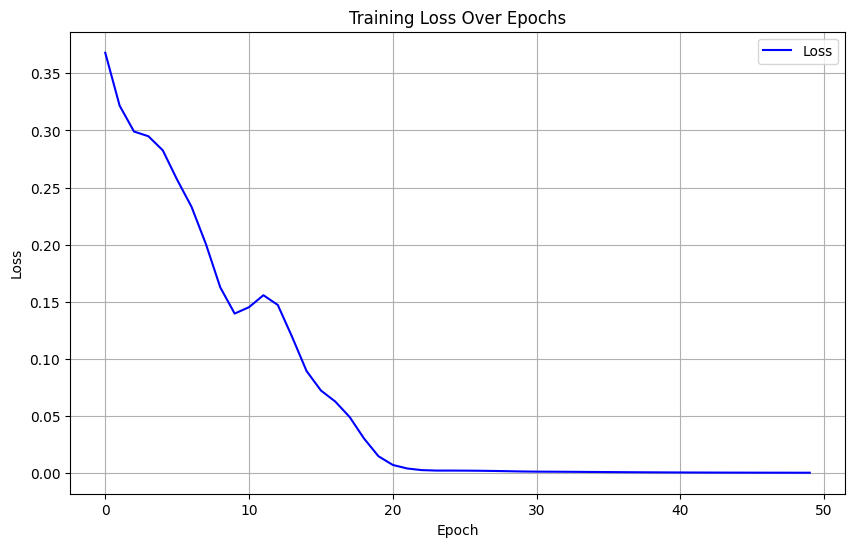

In [3]:
# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Loss functions
def binary_cross_entropy(y, output):
    epsilon = 1e-8  # To prevent log(0)
    return -np.mean(y * np.log(output + epsilon) + (1 - y) * np.log(1 - output + epsilon))

def mean_squared_error(y, output):
    return np.mean((y - output) ** 2)

# Hyperparameters
learning_rate = 0.3
epochs = 50
momentum = 0.9
patience = 100
threshold = 1e-6
loss_function = 'mse'  # Choose 'bce' for Binary Cross-Entropy or 'mse' for Mean Squared Error

loss_history, best_loss, no_improve = [], float('inf'), 0

for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_norm, W1) + b1
    hidden = relu(hidden_input)
    output_input = np.dot(hidden, W2) + b2
    output = sigmoid(output_input)
    
    # Compute loss
    if loss_function == 'bce':
        loss = binary_cross_entropy(y, output)
    elif loss_function == 'mse':
        loss = mean_squared_error(y, output)
    else:
        raise ValueError("Unsupported loss function. Choose 'bce' or 'mse'.")
    loss_history.append(loss)
    
    # Backpropagation
    if loss_function == 'bce':
        error = output - y
    elif loss_function == 'mse':
        error = -(y - output)
    
    if loss_function == 'bce':
        delta2 = error * sigmoid_derivative(output)
    elif loss_function == 'mse':
        delta2 = error * sigmoid_derivative(output)  # Derivative remains the same for consistency
    
    delta1 = np.dot(delta2, W2.T) * relu_derivative(hidden)
    
    # Gradients
    grad_W2 = np.dot(hidden.T, delta2)
    grad_b2 = delta2.sum(axis=0, keepdims=True)
    grad_W1 = np.dot(X_norm.T, delta1)
    grad_b1 = delta1.sum(axis=0, keepdims=True)
    
    # Momentum update
    v_W2 = momentum * v_W2 - learning_rate * grad_W2
    v_b2 = momentum * v_b2 - learning_rate * grad_b2
    v_W1 = momentum * v_W1 - learning_rate * grad_W1
    v_b1 = momentum * v_b1 - learning_rate * grad_b1
    
    # Update weights
    W2 += v_W2
    b2 += v_b2
    W1 += v_W1
    b1 += v_b1
    
    # Early stopping
    if loss < best_loss - threshold:
        best_loss, no_improve = loss, 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break
    
    # Logging
    if epoch % max(1, epochs // 10) == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss:.6f}')

# Final weights and biases
print("\nFinal Weights and Biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

# Plot loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label="Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Test inputs
test_input = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Normalize test inputs using training data statistics
test_input_normalized = (test_input - X_mean) / X_std
# Testing the trained model
predicted_output = output  # From the last forward pass during training

# For clarity, perform forward propagation again on test data
layer1_input_test = np.dot(test_input_normalized, W1) + b1
layer1_output_test = relu(layer1_input_test)

layer2_input_test = np.dot(layer1_output_test, W2) + b2
predicted_output_test = sigmoid(layer2_input_test)

# Convert predictions to percentages
percented_output = predicted_output_test * 100

for i, prediction in enumerate(percented_output):
    rounded_output = round(predicted_output_test[i][0])
    print(f"Test: {test_input[i]} -> Predicted: {prediction[0]:.2f}% one (Rounded: {rounded_output})")

Test: [0 0] -> Predicted: 2.38% one (Rounded: 0)
Test: [0 1] -> Predicted: 99.31% one (Rounded: 1)
Test: [1 0] -> Predicted: 100.00% one (Rounded: 1)
Test: [1 1] -> Predicted: 1.70% one (Rounded: 0)
